<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# SP500 Descriptive Analysis Guide


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

## Purpose

> This code will create a visualization that represents daily volatility of sectors within the S&P500 Index. This Notebook is a guide for how to wrangle and format data in a uniform way so it can be replicated by multiple team members for their assigned sectors within the S&P500 Index. Using the high and low price for the day, calculate the difference(volatility) as a percent. Then get the average volatility for the month. Compare the volatility against the other sectors and evaluate for correlation, divergence and which sectors appear to have the most volatility.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Israel Data
Financials = pd.read_csv("../Data/Financials2_JV.csv")

In [3]:
# Jorge Data
Healthcare = pd.read_csv("../Data/HC_JV.csv")

In [4]:
# Jesus Data
IT = pd.read_csv("../Data/IT(1)_JV.csv")


In [5]:
CD = pd.read_csv ("../Data/CD_JV.csv")

# We will all need to meet to work out the details but we are going to try to make the data uniform by selecting the average price on a monthly or yearly basis

In [6]:
Financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
Healthcare.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close*',
       'Adj Close**', 'Volume'],
      dtype='object')

In [8]:
Healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  1258 non-null   int64 
 1   Unnamed: 0    1258 non-null   int64 
 2   Date          1258 non-null   object
 3   Open          1258 non-null   object
 4   High          1258 non-null   object
 5   Low           1258 non-null   object
 6   Close*        1258 non-null   object
 7   Adj Close**   1258 non-null   object
 8   Volume        1258 non-null   object
dtypes: int64(2), object(7)
memory usage: 88.6+ KB


In [9]:
Healthcare.head()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,0,"Jun 16, 2023","1,536.36","1,548.07","1,534.73","1,536.25","1,536.25","375,518,800"
1,1,1,"Jun 15, 2023","1,512.91","1,538.34","1,512.91","1,536.36","1,536.36","189,457,500"
2,2,2,"Jun 14, 2023","1,530.05","1,530.05","1,507.72","1,512.91","1,512.91","227,372,400"
3,3,3,"Jun 13, 2023","1,522.00","1,532.23","1,518.94","1,530.05","1,530.05","177,858,200"
4,4,4,"Jun 12, 2023","1,515.05","1,522.57","1,510.34","1,522.00","1,522.00","167,351,500"


In [10]:
IT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [11]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.2  1258 non-null   int64 
 1   Unnamed: 0.1  1258 non-null   int64 
 2   Unnamed: 0    1258 non-null   int64 
 3   Date          1258 non-null   object
 4   Open          1258 non-null   object
 5   High          1258 non-null   object
 6   Low           1258 non-null   object
 7   Close*        1258 non-null   object
 8   Adj Close**   1258 non-null   object
 9   Volume        1258 non-null   object
dtypes: int64(3), object(7)
memory usage: 98.4+ KB


### Inspecting the data to see what wrangling needs to be done.

In [12]:
Financials.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,69.629997,70.099998,69.330002,70.059998,62.412540,409300
1,2018-06-19,69.379997,70.099998,69.279999,69.940002,62.305649,438000
2,2018-06-20,70.360001,70.449997,69.779999,69.830002,62.207642,427600
3,2018-06-21,69.599998,69.980003,69.150002,69.620003,62.020561,1670900
4,2018-06-22,70.000000,70.099998,69.230003,69.250000,61.690964,300500


In [13]:
Financials.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-06-09,80.180000,80.629997,80.080002,80.239998,80.239998,282600
1254,2023-06-12,80.239998,80.629997,79.639999,80.169998,80.169998,237200
1255,2023-06-13,80.250000,81.139999,80.139999,80.800003,80.800003,268000
1256,2023-06-14,81.000000,81.410004,80.169998,80.470001,80.470001,4293800
1257,2023-06-15,80.089996,81.629997,80.059998,81.489998,81.489998,333900


In [14]:
# We have a good 10 years of data for Financials

In [15]:
IT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,137.679993,138.250000,136.699997,137.759995,137.759995,361400
1,2018-06-19,136.720001,137.789993,135.910004,137.199997,137.199997,539800
2,2018-06-20,137.320007,137.699997,136.039993,136.520004,136.520004,522400
3,2018-06-21,136.660004,137.229996,135.380005,135.820007,135.820007,318700
4,2018-06-22,136.080002,137.419998,134.639999,134.960007,134.960007,1090500


In [16]:
IT.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-06-09,344.750000,348.290009,343.429993,344.549988,344.549988,458000
1254,2023-06-12,347.269989,353.779999,345.859985,352.339996,352.339996,414500
1255,2023-06-13,353.799988,357.489990,353.079987,354.850006,354.850006,518800
1256,2023-06-14,353.799988,357.440002,349.970001,352.369995,352.369995,472700
1257,2023-06-15,353.019989,358.149994,353.019989,356.190002,356.190002,529000


In [17]:
# It appears for IT we only have about 5 year of data

In [18]:
Healthcare.head()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,0,"Jun 16, 2023","1,536.36","1,548.07","1,534.73","1,536.25","1,536.25","375,518,800"
1,1,1,"Jun 15, 2023","1,512.91","1,538.34","1,512.91","1,536.36","1,536.36","189,457,500"
2,2,2,"Jun 14, 2023","1,530.05","1,530.05","1,507.72","1,512.91","1,512.91","227,372,400"
3,3,3,"Jun 13, 2023","1,522.00","1,532.23","1,518.94","1,530.05","1,530.05","177,858,200"
4,4,4,"Jun 12, 2023","1,515.05","1,522.57","1,510.34","1,522.00","1,522.00","167,351,500"


In [19]:
Healthcare.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
1253,1253,1253,"Jun 25, 2018",981.66,983.11,967.10,974.48,974.48,-
1254,1254,1254,"Jun 22, 2018",982.02,987.22,980.32,983.37,983.37,-
1255,1255,1255,"Jun 21, 2018",984.73,984.73,976.79,979.24,979.24,-
1256,1256,1256,"Jun 20, 2018",983.61,986.95,982.15,984.48,984.48,-
1257,1257,1257,"Jun 19, 2018",975.25,982.80,973.89,982.47,982.47,-


In [20]:
CD.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,0,0,"Jun 16, 2023","1,309.45","1,310.06","1,297.96","1,298.65","1,298.65","610,126,300"
1,1,1,1,"Jun 15, 2023","1,281.80","1,305.70","1,278.47","1,301.04","1,301.04","494,538,800"
2,2,2,2,"Jun 14, 2023","1,295.86","1,299.41","1,275.46","1,292.23","1,292.23","508,152,400"
3,3,3,3,"Jun 13, 2023","1,292.28","1,294.55","1,280.39","1,293.65","1,293.65","494,163,200"
4,4,4,4,"Jun 12, 2023","1,267.53","1,282.99","1,263.15","1,280.79","1,280.79","535,114,300"


In [21]:
CD.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
1253,1253,1253,1253,"Jun 25, 2018",881.99,882.23,862.38,867.52,867.52,-
1254,1254,1254,1254,"Jun 22, 2018",892.64,893.14,886.10,886.81,886.81,-
1255,1255,1255,1255,"Jun 21, 2018",895.70,896.44,886.67,888.02,888.02,-
1256,1256,1256,1256,"Jun 20, 2018",895.18,897.11,891.43,894.32,894.32,-
1257,1257,1257,1257,"Jun 19, 2018",884.54,890.22,881.92,890.09,890.09,-


In [22]:
# Here we have a good 5 years of data

## We will plan on creating 12 data points, one for each month since we are limited by the IT dataset. 
> The end goal will be to show the average difference between the High and Low prices on a percentage basis. We will take the average on a monthly bassis from June 2022 to June 2023.These dates are chosen based on what is available in the IT dataset. With this format applied to each dataset we can merge all of the data together and assess correlation and divergence. 

# Step 1: Wrangle the data

In [23]:
# Here are the wrangline objectives

# We need the Date in numeric format.

# Create a column showing the difference between High and Low as a percent.

# Create a new df with a '_W' at the end to indicate Wrangling with only necesary columns

# Isolate Date range for June 2022 to June 2023

# Parse the Dates 

# Group the data by month and calculate the mean

# Create visualization for individual dataset

In [24]:
# Converting dates to datetime format

Financials['Date'] = pd.to_datetime(Financials['Date'])
IT['Date'] = pd.to_datetime(IT['Date'])
Healthcare['Date'] = pd.to_datetime(Healthcare['Date'])
CD['Date'] = pd.to_datetime(CD['Date'], format='%b %d, %Y')

### In the Healthcare the prices are string Dtype. They must be converted to numeric for calculating the difference. 

In [25]:
Healthcare.head()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,0,2023-06-16,"1,536.36","1,548.07","1,534.73","1,536.25","1,536.25","375,518,800"
1,1,1,2023-06-15,"1,512.91","1,538.34","1,512.91","1,536.36","1,536.36","189,457,500"
2,2,2,2023-06-14,"1,530.05","1,530.05","1,507.72","1,512.91","1,512.91","227,372,400"
3,3,3,2023-06-13,"1,522.00","1,532.23","1,518.94","1,530.05","1,530.05","177,858,200"
4,4,4,2023-06-12,"1,515.05","1,522.57","1,510.34","1,522.00","1,522.00","167,351,500"


In [26]:
CD['High'] = CD['High'].str.replace(",", "")
CD['Low'] = CD['Low'].str.replace(",", "")

In [27]:
CD['High'] = pd.to_numeric(CD['High'], errors='coerce')
CD['Low'] = pd.to_numeric(CD['Low'], errors='coerce')

In [28]:
Healthcare['High'] = Healthcare['High'].str.replace(",", "")
Healthcare['Low'] = Healthcare['Low'].str.replace(",", "")

In [29]:
Healthcare.head()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,0,2023-06-16,"1,536.36",1548.07,1534.73,"1,536.25","1,536.25","375,518,800"
1,1,1,2023-06-15,"1,512.91",1538.34,1512.91,"1,536.36","1,536.36","189,457,500"
2,2,2,2023-06-14,"1,530.05",1530.05,1507.72,"1,512.91","1,512.91","227,372,400"
3,3,3,2023-06-13,"1,522.00",1532.23,1518.94,"1,530.05","1,530.05","177,858,200"
4,4,4,2023-06-12,"1,515.05",1522.57,1510.34,"1,522.00","1,522.00","167,351,500"


In [30]:
Healthcare['High'] = pd.to_numeric(Healthcare['High'], errors='coerce')
Healthcare['Low'] = pd.to_numeric(Healthcare['Low'], errors='coerce')

In [31]:
Healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  1258 non-null   int64         
 1   Unnamed: 0    1258 non-null   int64         
 2   Date          1258 non-null   datetime64[ns]
 3   Open          1258 non-null   object        
 4   High          1255 non-null   float64       
 5   Low           1255 non-null   float64       
 6   Close*        1258 non-null   object        
 7   Adj Close**   1258 non-null   object        
 8   Volume        1258 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 88.6+ KB


In [32]:
# Create Column showing the difference beween the Open and Close price !!!as a percentage!!!
# ** The percent changed is based on the opening price for the session

# All of these columns will eventually be merged so we need to add a suffix to the colunms

Financials['diff_financials'] = ((Financials['High'] - Financials['Low'])/ Financials['Low']) * (100)
IT['diff_IT'] = ((IT['High'] - IT['Low'])/ IT['Low']) * (100)
Healthcare['diff_Healthcare'] = ((Healthcare['High'] - Healthcare['Low'])/ (Healthcare['Low'])) * (100)
CD['diff_CD'] = ((CD['High'] - CD['Low'])/ CD['Low']) * (100)

In [33]:
CD.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume,diff_CD
0,0,0,0,2023-06-16,"1,309.45",1310.06,1297.96,"1,298.65","1,298.65","610,126,300",0.932232
1,1,1,1,2023-06-15,"1,281.80",1305.70,1278.47,"1,301.04","1,301.04","494,538,800",2.129890
2,2,2,2,2023-06-14,"1,295.86",1299.41,1275.46,"1,292.23","1,292.23","508,152,400",1.877754
3,3,3,3,2023-06-13,"1,292.28",1294.55,1280.39,"1,293.65","1,293.65","494,163,200",1.105913
4,4,4,4,2023-06-12,"1,267.53",1282.99,1263.15,"1,280.79","1,280.79","535,114,300",1.570676


### Here we can inspect the changes before moving forward 
> Specifically we are looking at our difference column

> The difference column require a unique ID for the data it represents since we are merging the datasets. The standard naming convention will be 'diff_suffix"

In [34]:
Financials.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff_financials
0,2018-06-18,69.629997,70.099998,69.330002,70.059998,62.412540,409300,1.110625
1,2018-06-19,69.379997,70.099998,69.279999,69.940002,62.305649,438000,1.183601
2,2018-06-20,70.360001,70.449997,69.779999,69.830002,62.207642,427600,0.960158
3,2018-06-21,69.599998,69.980003,69.150002,69.620003,62.020561,1670900,1.200291
4,2018-06-22,70.000000,70.099998,69.230003,69.250000,61.690964,300500,1.256673


In [35]:
IT.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff_IT
0,2018-06-18,137.679993,138.250000,136.699997,137.759995,137.759995,361400,1.133872
1,2018-06-19,136.720001,137.789993,135.910004,137.199997,137.199997,539800,1.383260
2,2018-06-20,137.320007,137.699997,136.039993,136.520004,136.520004,522400,1.220232
3,2018-06-21,136.660004,137.229996,135.380005,135.820007,135.820007,318700,1.366517
4,2018-06-22,136.080002,137.419998,134.639999,134.960007,134.960007,1090500,2.064765


In [36]:
Healthcare.head()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume,diff_Healthcare
0,0,0,2023-06-16,"1,536.36",1548.07,1534.73,"1,536.25","1,536.25","375,518,800",0.869208
1,1,1,2023-06-15,"1,512.91",1538.34,1512.91,"1,536.36","1,536.36","189,457,500",1.680867
2,2,2,2023-06-14,"1,530.05",1530.05,1507.72,"1,512.91","1,512.91","227,372,400",1.481044
3,3,3,2023-06-13,"1,522.00",1532.23,1518.94,"1,530.05","1,530.05","177,858,200",0.874952
4,4,4,2023-06-12,"1,515.05",1522.57,1510.34,"1,522.00","1,522.00","167,351,500",0.809751


In [37]:
CD.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume,diff_CD
0,0,0,0,2023-06-16,"1,309.45",1310.06,1297.96,"1,298.65","1,298.65","610,126,300",0.932232
1,1,1,1,2023-06-15,"1,281.80",1305.70,1278.47,"1,301.04","1,301.04","494,538,800",2.129890
2,2,2,2,2023-06-14,"1,295.86",1299.41,1275.46,"1,292.23","1,292.23","508,152,400",1.877754
3,3,3,3,2023-06-13,"1,292.28",1294.55,1280.39,"1,293.65","1,293.65","494,163,200",1.105913
4,4,4,4,2023-06-12,"1,267.53",1282.99,1263.15,"1,280.79","1,280.79","535,114,300",1.570676


## Now we are creating our wrangled dataframe with '_W' suffix.
> This dataset will be trimmed down containing only necessary data for the analysis.

In [38]:
Financials_W = Financials[['Date', 'diff_financials']]
IT_W = IT[['Date', 'diff_IT']]
Healthcare_W = Healthcare[['Date','diff_Healthcare']]
CD_W = CD[['Date', 'diff_CD']]

#### Take a look and make sure this is correct

In [39]:
Financials_W.head(2)

,Date,diff_financials
0,2018-06-18,1.110625
1,2018-06-19,1.183601


In [40]:
IT_W.head(2)

,Date,diff_IT
0,2018-06-18,1.133872
1,2018-06-19,1.383260


In [41]:
Healthcare_W.head(2)

,Date,diff_Healthcare
0,2023-06-16,0.869208
1,2023-06-15,1.680867


In [42]:
CD_W.head(2)

,Date,diff_CD
0,2023-06-16,0.932232
1,2023-06-15,2.129890


## Trim the data down to only June 2018to June 2023

In [43]:
# Assign the start and end dates we want to filter as a variable
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2023-05-30')

In [44]:
# Use stand and end dates to trim the data for the desired uniform dates. 
Financials_W = Financials_W[(Financials_W['Date'] >= start_date) & (Financials_W['Date'] <= end_date)]

In [45]:
# Use stand and end dates to trim the data for the desired uniform dates. 
IT_W = IT_W[(IT_W['Date'] >= start_date) & (IT_W['Date'] <= end_date)]

In [46]:
# Use stand and end dates to trim the data for the desired uniform dates. 
Healthcare_W = Healthcare_W[(Healthcare_W['Date'] >= start_date) & (Healthcare_W['Date'] <= end_date)]

In [47]:
CD_W = CD_W[(CD_W['Date'] >= start_date) & (CD_W['Date'] <= end_date)]

### Financials- Parse dates, calcuate mean, and generate visualization

In [48]:
# Extract year and month
Financials_W['year_month'] = Financials_W['Date'].dt.strftime('%Y-%m')

In [49]:
Financials_W.head(2)

,Date,diff_financials,year_month
0,2018-06-18,1.110625,2018-06
1,2018-06-19,1.183601,2018-06


In [50]:
# Group the data by month and get the mean of the daily percent

Financials_mean = Financials_W.groupby('year_month')['diff_financials'].mean()

In [51]:
# resetting the index corrects index to maintain column name integrity.
Financials_mean = Financials_mean.reset_index()
Financials_mean.head()

,year_month,diff_financials
0,2018-06,1.322060
1,2018-07,1.133004
2,2018-08,0.808557
3,2018-09,0.925449
4,2018-10,1.958005


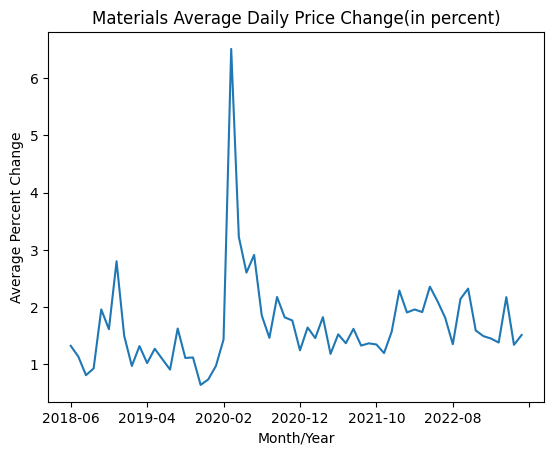

In [52]:
# Set the 'Year' column as the index

Financials_mean = Financials_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
Financials_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axis

# Plotting the Inflation Data as a line graph
Financials_mean['diff_financials'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Materials Average Daily Price Change(in percent)')
plt.show()

### IT- Parse dates, calcuate mean, and generate visualization

In [53]:
# Extract year and month
IT_W['year_month'] = IT_W['Date'].dt.strftime('%Y-%m')

In [54]:
IT_W.head(2)

,Date,diff_IT,year_month
0,2018-06-18,1.133872,2018-06
1,2018-06-19,1.383260,2018-06


In [55]:
# Group the data by month and get the mean of the daily percent

IT_mean = IT_W.groupby('year_month')['diff_IT'].mean()

In [56]:
# resetting the index corrects index to maintain column name integrity.
IT_mean = IT_mean.reset_index()
IT_mean.head()

,year_month,diff_IT
0,2018-06,1.800008
1,2018-07,1.463536
2,2018-08,1.615201
3,2018-09,1.835214
4,2018-10,2.577963


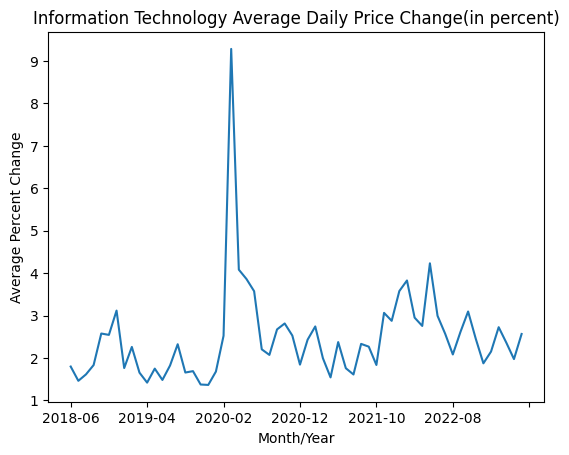

In [57]:
# Set the 'Year' column as the index

IT_mean = IT_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
IT_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axis

# Plotting the Inflation Data as a line graph
IT_mean['diff_IT'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Information Technology Average Daily Price Change(in percent)')
plt.show()

### Healthcare- Parse dates, calcuate mean, and generate visualization

In [58]:
# Extract year and month
Healthcare_W['year_month'] = Healthcare_W['Date'].dt.strftime('%Y-%m')

In [59]:
Healthcare_W.head(2)

,Date,diff_Healthcare,year_month
13,2023-05-30,1.113619,2023-05
14,2023-05-26,1.222345,2023-05


In [60]:
# Group the data by month and get the mean of the daily percent

Healthcare_mean = Healthcare_W.groupby('year_month')['diff_Healthcare'].mean()

In [61]:
# resetting the index corrects index to maintain column name integrity.
Healthcare_mean = Healthcare_mean.reset_index()
Healthcare_mean.head()

,year_month,diff_Healthcare
0,2018-06,0.993753
1,2018-07,0.772936
2,2018-08,0.617620
3,2018-09,0.712748
4,2018-10,1.808205


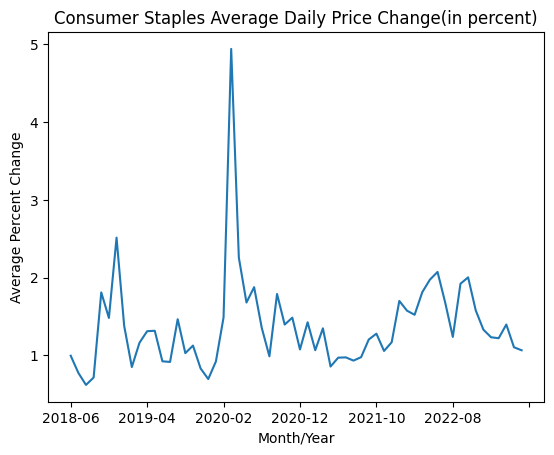

In [62]:
# Set the 'Year' column as the index

Healthcare_mean = Healthcare_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
Healthcare_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axi

# Plotting the Inflation Data as a line graph
Healthcare_mean['diff_Healthcare'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Consumer Staples Average Daily Price Change(in percent)')
plt.show()

### Consumer Discretionary(CD)- Parse dates, calcuate mean, and generate visualization

In [63]:
# Extract year and month
CD_W['year_month'] = CD_W['Date'].dt.strftime('%Y-%m')

In [64]:
CD_W.head(2)

,Date,diff_CD,year_month
13,2023-05-30,1.392152,2023-05
14,2023-05-26,2.838211,2023-05


In [65]:
# Group the data by month and get the mean of the daily percent

CD_mean = CD_W.groupby('year_month')['diff_CD'].mean()

In [66]:
# resetting the index corrects index to maintain column name integrity.
CD_mean = CD_mean.reset_index()
CD_mean.head()

,year_month,diff_CD
0,2018-06,1.241266
1,2018-07,0.968630
2,2018-08,0.788365
3,2018-09,0.904002
4,2018-10,2.291125


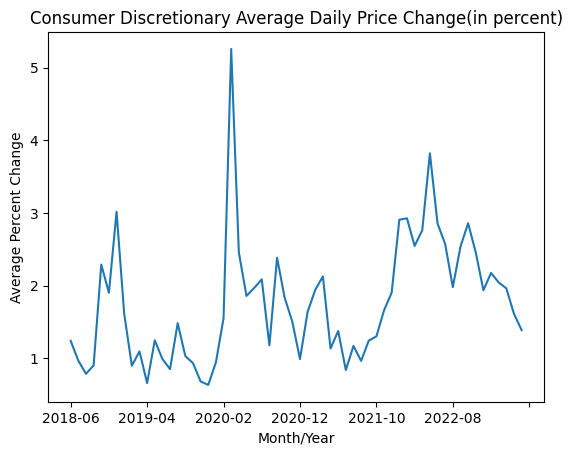

In [67]:
# Set the 'Year' column as the index

CD_mean = CD_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
CD_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axi

# Plotting the Inflation Data as a line graph
CD_mean['diff_CD'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Consumer Discretionary Average Daily Price Change(in percent)')
plt.show()

# Now we combine the Datasets and put them all in one graph

In [68]:
# Merge materials data and IT data
all_1 = pd.merge(Financials_mean, IT_mean, on='year_month', suffixes=('_mat', '_IT'))

In [69]:
# Merge all_1 with Consumer Staples Data
all_2 = pd.merge(all_1, Healthcare_mean, on='year_month',suffixes=('_all_1', '_Healthcare'))

In [70]:
all_3 = pd.merge(all_2, CD_mean, on='year_month',suffixes=('_all_2', '_CD'))

In [71]:
all_3.head()

,index_mat,diff_financials,index_IT,diff_IT,index_all_2,diff_Healthcare,index_CD,diff_CD
year_month,,,,,,,,
2018-06,0,1.322060,0,1.800008,0,0.993753,0,1.241266
2018-07,1,1.133004,1,1.463536,1,0.772936,1,0.968630
2018-08,2,0.808557,2,1.615201,2,0.617620,2,0.788365
2018-09,3,0.925449,3,1.835214,3,0.712748,3,0.904002
2018-10,4,1.958005,4,2.577963,4,1.808205,4,2.291125


In [72]:
# Select only necessary columnns for analysis
all_4 = all_3[['diff_financials','diff_IT', 'diff_Healthcare','diff_CD']]

## Notice when all_3 is called without .reset_index() the year_month column is indexed properly with the other column names. 
> If you run all_3.columns 'year_month' will not display as a column name. Running .reset_index() remedies this

In [73]:

all_4

,diff_financials,diff_IT,diff_Healthcare,diff_CD
year_month,,,,
2018-06,1.322060,1.800008,0.993753,1.241266
2018-07,1.133004,1.463536,0.772936,0.968630
2018-08,0.808557,1.615201,0.617620,0.788365
2018-09,0.925449,1.835214,0.712748,0.904002
2018-10,1.958005,2.577963,1.808205,2.291125
2018-11,1.611823,2.546064,1.479465,1.903437
2018-12,2.800001,3.118425,2.513071,3.017683
2019-01,1.495408,1.764744,1.376152,1.613459
2019-02,0.969721,2.262169,0.847740,0.900015


In [74]:
all_4.columns

Index(['diff_financials', 'diff_IT', 'diff_Healthcare', 'diff_CD'], dtype='object')

In [75]:
all_4 = all_4.reset_index()
all_4.to_csv("../Data/all_4_JV.csv")

# Visualizing the combined data

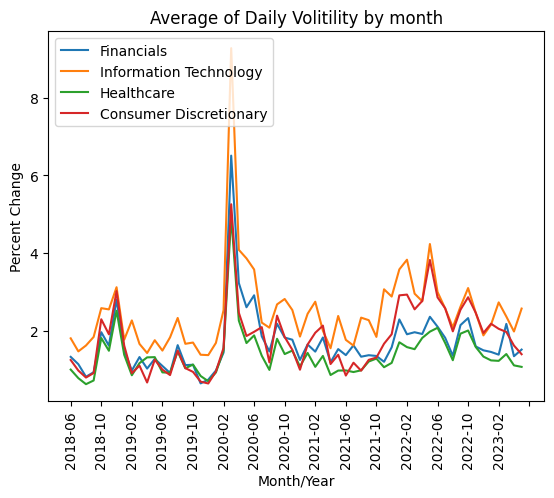

<Figure size 640x480 with 0 Axes>

In [79]:

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plotting the variables on the primary y-axis
ax1.plot(all_4['diff_financials'], label='Financials')
ax1.plot(all_4['diff_IT'], label='Information Technology')
ax1.plot(all_4['diff_Healthcare'], label='Healthcare')
ax1.plot(all_4['diff_CD'], label='Consumer Discretionary')


# Set the labels and title for the primary y-axis
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Percent Change')
ax1.set_title('Average of Daily Volitility by month')

#Sets the amount of ticks shown on the x-axis
ax1.xaxis.set_major_locator(plt.MaxNLocator(21))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)


# Display the legend for both y-axes
ax1.legend(loc='upper left') 


# Show the plot
plt.show()

#Improves layout and spacing of the plot elements
plt.tight_layout()

- [Financials Data](https://finance.yahoo.com/quote/%5ESP500-40/history?p=%5ESP500-40)
- [Healthcare data](https://finance.yahoo.com/quote/%5ESP500-35/history?period1=1529366400&period2=1687132800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)
- [IT Data](https://finance.yahoo.com/quote/%5ESP500-451020/history?p=%5ESP500-451020)
- [Consumer Discretionary Data](https://finance.yahoo.com/quote/%5ESP500-25/history?period1=1529020800&period2=1686787200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)